In [0]:
%matplotlib inline


# Harmonic-percussive source separation


This notebook illustrates how to separate an audio signal into
its harmonic and percussive components.

We'll compare the original median-filtering based approach of
`Fitzgerald, 2010 <http://arrow.dit.ie/cgi/viewcontent.cgi?article=1078&context=argcon>`_
and its margin-based extension due to `Dreidger, Mueller and Disch, 2014
<http://www.terasoft.com.tw/conf/ismir2014/proceedings/T110_127_Paper.pdf>`_.





In [0]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

Load the example clip.



In [0]:
y, sr = librosa.load('02_11004_2_Ninnuvina.wav')

Compute the short-time Fourier transform of y



In [0]:
D = librosa.stft(y)

Decompose D into harmonic and percussive components

$D = D_\text{harmonic} + D_\text{percussive}$



In [0]:
D_harmonic, D_percussive = librosa.decompose.hpss(D)

We can plot the two components along with the original spectrogram



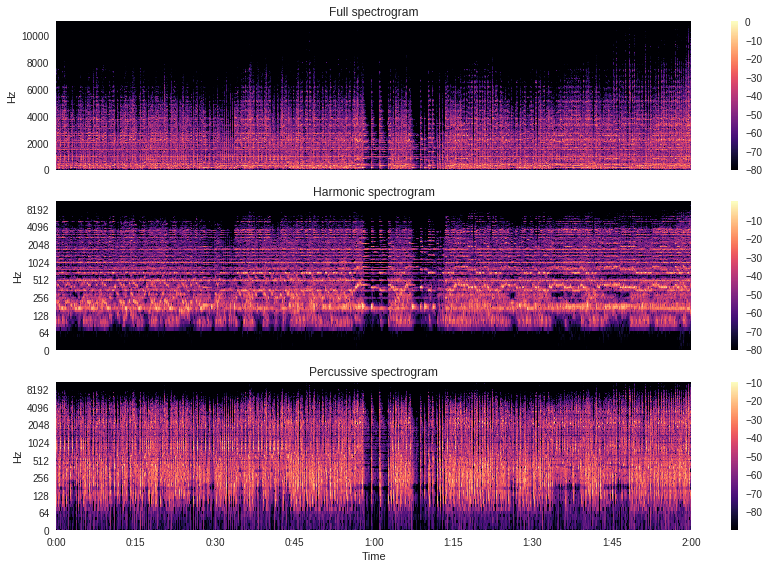

In [0]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=rp), y_axis= 'linear')
plt.colorbar()
plt.title('Full spectrogram')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')

plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

The default HPSS above assigns energy to each time-frequency bin according to
whether a horizontal (harmonic) or vertical (percussive) filter responds higher
at that position.

This assumes that all energy belongs to either a harmonic or percussive source,
but does not handle "noise" well.  Noise energy ends up getting spread between
D_harmonic and D_percussive.

If we instead require that the horizontal filter responds more than the vertical
filter *by at least some margin*, and vice versa, then noise can be removed
from both components.

Note: the default (above) corresponds to margin=1



In [0]:
# Let's compute separations for a few different margins and compare the results below
D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)

In the plots below, note that vibrato has been suppressed from the harmonic
components, and vocals have been suppressed in the percussive components.



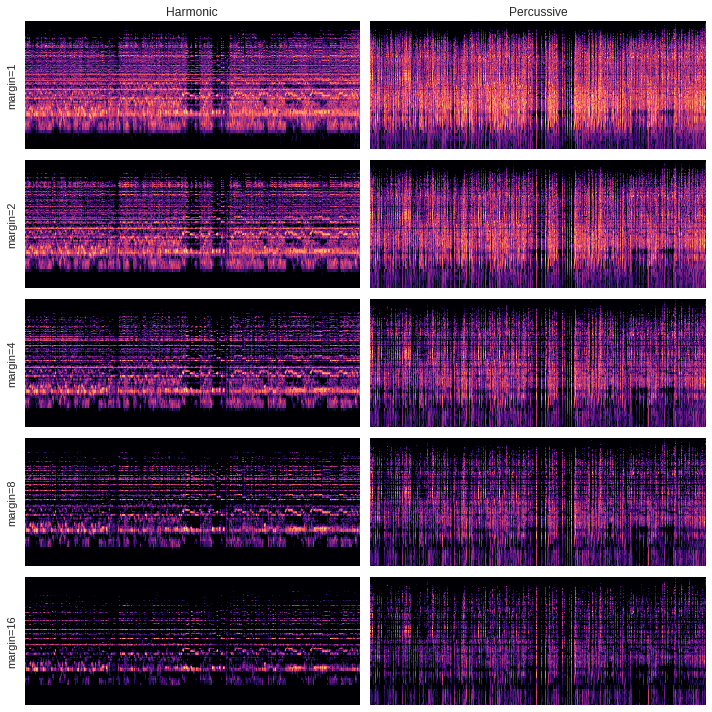

In [0]:
plt.figure(figsize=(10, 10))

plt.subplot(5, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic), ref=rp), y_axis='log')
plt.title('Harmonic')
plt.yticks([])
plt.ylabel('margin=1')

plt.subplot(5, 2, 2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive), ref=rp), y_axis='log')
plt.title('Percussive')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic2), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=2')

plt.subplot(5, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive2), ref=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5, 2, 5)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic4), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=4')

plt.subplot(5, 2, 6)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive4), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 7)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic8), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=8')

plt.subplot(5, 2, 8)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive8), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.subplot(5, 2, 9)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_harmonic16), ref=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=16')

plt.subplot(5, 2, 10)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_percussive16), ref=rp), y_axis='log')
plt.yticks([]), plt.ylabel('')

plt.tight_layout()
plt.show()

In [0]:
!pwd

/content/drive/My Drive/data/audio


In [0]:
%cd "/content/drive/My Drive/data/audio"

/content/drive/My Drive/data/audio
